In [59]:
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [60]:
with open('dados/depresso.pkl', 'rb') as f:
  X_train, X_test, y_train, y_test = pickle.load(f)

In [61]:
modelo = xgb.XGBClassifier()

In [62]:
param_grid = {
    'colsample_bytree': [0.5, 0.540, 0.570, 0.6, 0.8],  # Variação nas proporções de colunas usadas
    'gamma': [0, 0.1, 0.2, 0.3],  # Regularização gamma para maior controle de complexidade
    'learning_rate': [0.01, 0.03, 0.04, 0.05, 0.1],  # Taxa de aprendizado variando de mais baixa a mais alta
    'max_depth': [4, 6, 8, 10],  # Diferentes profundidades máximas das árvores
    'min_child_weight': [1, 3, 5, 7],  # Variação no peso mínimo para uma folha
    'n_estimators': [300, 400],  # Número de árvores variando de 100 a 500
    'reg_alpha': [0.001, 0.01, 0.1, 1],  # Regularização L1 (alpha)
    'reg_lambda': [0.5, 1, 1.5, 2],  # Regularização L2 (lambda)
    'subsample': [0.5, 0.631, 0.7, 0.8, 1.0]  # Amostragem variada de 50% a 100%
}


In [63]:
random_search = RandomizedSearchCV(
    estimator= modelo, 
    param_distributions=param_grid, 
    n_iter=100,  # Número de combinações aleatórias a testar
    scoring='accuracy',  # Métrica de avaliação
    cv=3,  # Validação cruzada com 3 folds
    verbose=1,  # Mostrar progresso
    random_state=42,  # Para reprodutibilidade
    n_jobs=-1  # Usar todos os núcleos disponíveis para acelerar
)

In [64]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.54, 0.57,
                                                             0.6, 0.8],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [4, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [300, 400],
                                        'reg_alpha': [0.001, 0.01, 0.1, 1],
                                        'reg_lambda': [0.5, 1, 1.5, 2],
                                        'subsample': [0.5, 0.631, 0.7, 0.8,
                                                      1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [65]:
melhor_modelo = random_search.best_estimator_

In [66]:
previsoes = melhor_modelo.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.7678758187923157

In [68]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 1378,   281],
       [ 3936, 12572]])

0.7610502559586063

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

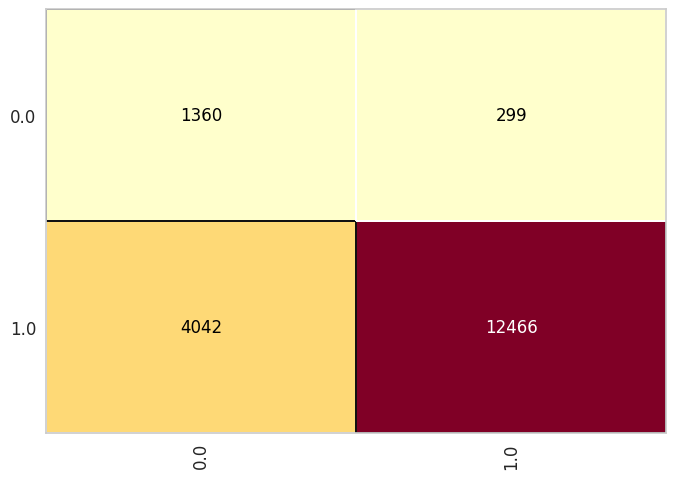

In [69]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [70]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.26      0.83      0.40      1659
         1.0       0.98      0.76      0.86     16508

    accuracy                           0.77     18167
   macro avg       0.62      0.80      0.63     18167
weighted avg       0.91      0.77      0.81     18167



In [71]:
# Criar uma lista com os nomes das features (substitua pelos nomes corretos)
nomes_das_features = ['C009_1',
 'C009_2',
 'C009_3',
 'C011_1.0',
 'C011_2.0',
 'C011_3.0',
 'C011_4.0',
 'C006',
 'C00703',
 'D00901',
 'J007',
 'M01401',
 'M01501',
 'M01601',
 'M01901',
 'N001',
 'N00101',
 'N010',
 'N011',
 'N012',
 'N013',
 'N014',
 'N015',
 'N016',
 'N017',
 'N018',
 'P018',
 'P02002',
 'P02602',
 'P027',
 'P034',
 'P04502',
 'P050',
 'Q120',
 'V00201',
 'V00203',
 'V02802',
 'H001',
 'VDF002']

In [72]:
import shap

# Criar o explainer baseado no modelo Random Forest
explainer = shap.TreeExplainer(melhor_modelo)

# Gerar os valores SHAP para os dados de teste
shap_values = explainer.shap_values(X_test)

In [73]:
print(type(shap_values))
print(len(shap_values) if isinstance(shap_values, list) else shap_values.shape)


<class 'numpy.ndarray'>
(18167, 39)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

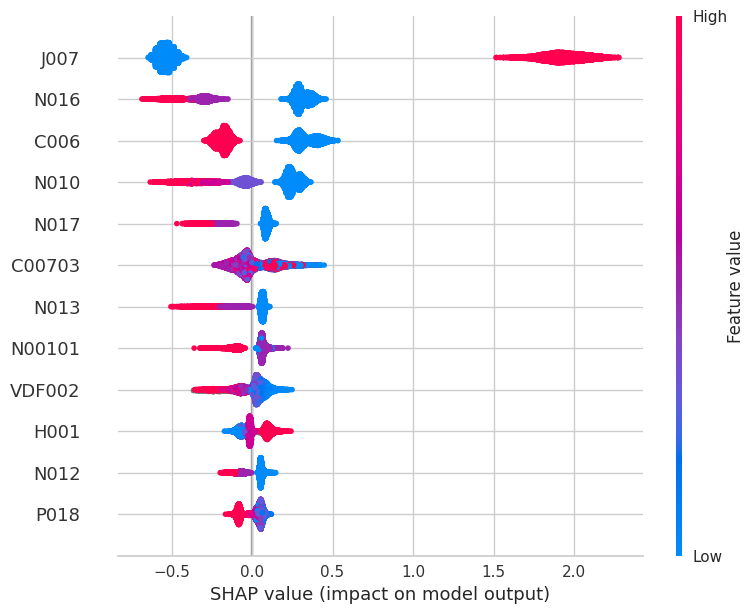

In [74]:
# Gerar o gráfico de resumo do SHAP para o modelo binário
shap.summary_plot(shap_values, X_test, feature_names=nomes_das_features, plot_type="dot", color_bar=True, max_display=12)

